<a href="https://colab.research.google.com/github/ParasRupani/sentiment_analysis/blob/main/Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Restaurant_Reviews.tsv',
                 sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
df['Review'] = df['Review'].str.lower()

In [7]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [8]:
import re, nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt', 'stopwords', 'wordnet')
stop_words = set(stopwords.words('english'))

# Removing punctuation, special chars
df['Review'] = df['Review'].apply(lambda text: re.sub(r'[^\w\s]', '', text))

# Tokenizing reviews
df['Review'] = df['Review'].apply(word_tokenize)

# Deleteing stopwords from the reviews
df['Review'] = df['Review'].apply(lambda tokens: [word for word in tokens if
                                                  word not in stop_words])

lemmatizer = WordNetLemmatizer() # Lemmatize better -> good, eating -> eat

df['Review'] = df['Review'].apply(lambda tokens: [lemmatizer.lemmatize(word) for
                                                  word in tokens])

In [9]:
df.head()

,Review,Liked
0,"[wow, loved, place]",1
1,"[crust, good]",0
2,"[tasty, texture, nasty]",0
3,"[stopped, late, may, bank, holiday, rick, stev...",1
4,"[selection, menu, great, price]",1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# 80% training, 20% testing
X = df['Review']
y = df['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

count_vectorizer = CountVectorizer(max_features=5000)
X_train_words = count_vectorizer.fit_transform(X_train.astype(str))
X_test_words = count_vectorizer.transform(X_test.astype(str))

In [11]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

# Training
naive_bayes.fit(X_train_words, y_train)

# Predicting
bayes_y_pred = naive_bayes.predict(X_test_words)
bayes_accuracy = accuracy_score(y_test, bayes_y_pred)
print(f'Accuracy: {bayes_accuracy:.2f}')

print(classification_report(y_test, bayes_y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       108
           1       0.67      0.75      0.71        92

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200



In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

# Training
logistic_regression.fit(X_train_words, y_train)

# Predicting
log_y_pred = logistic_regression.predict(X_test_words)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f'Accuracy: {log_accuracy:.2f}')

print(classification_report(y_test, log_y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       108
           1       0.72      0.76      0.74        92

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



In [13]:
import random
og_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Restaurant_Reviews.tsv', sep='\t')

# Randomly select 5 reviews
sampled_indices = random.sample(range(len(df)), 5)
sampled_data = df.iloc[sampled_indices]
og_data = og_df.iloc[sampled_indices]

sampled_data['Review'] = sampled_data['Review'].apply(lambda tokens: ' '.join(tokens))

sample_reviews_words = count_vectorizer.transform(sampled_data['Review'])
sample_predictions = logistic_regression.predict(sample_reviews_words)

results_df = pd.DataFrame({'Review': og_data['Review'],
                           'Prediction': sample_predictions,
                           'Actual': og_data['Liked']})

results_df['Prediction'] = results_df['Prediction'].replace({1: 'Positive', 0: 'Negative'})
results_df['Actual'] = results_df['Actual'].replace({1: 'Positive', 0: 'Negative'})

results_df.to_csv('sampled_results.tsv', sep='\t', index=False)
results_df

<ipython-input-13-604753450657>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['Review'] = sampled_data['Review'].apply(lambda tokens: ' '.join(tokens))


,Review,Prediction,Actual
845,This place deserves no stars.,Negative,Negative
781,Join the club and get awesome offers via email.,Positive,Positive
627,Any grandmother can make a roasted chicken bet...,Negative,Negative
245,-Drinks took close to 30 minutes to come out a...,Negative,Negative
485,"This isn't a small family restaurant, this is ...",Positive,Positive


In [14]:
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in lemmatized_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

def predict_sentiment(sample_review, classifier):
    preprocessed_review = preprocess_text(sample_review)
    temp = count_vectorizer.transform([preprocessed_review])
    prediction = classifier.predict(temp)[0]

    return prediction

# Example usage
sample_review = "I did not like the meal at the place"
predicted_sentiment = predict_sentiment(sample_review, logistic_regression)

if predicted_sentiment:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")


Predicted Sentiment: Negative


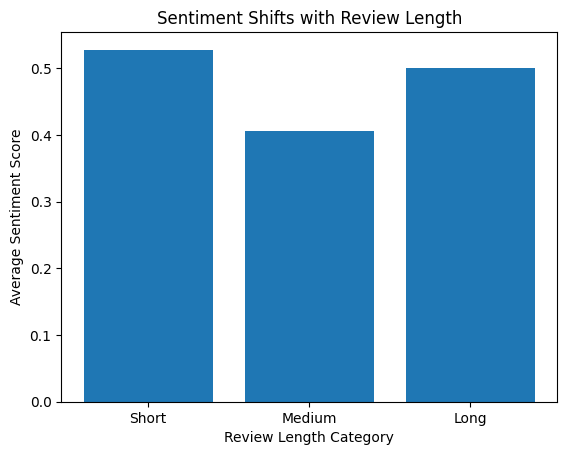

In [15]:
import matplotlib.pyplot as plt

# Calculate review lengths and add them as a new column to your dataset
df['Review_Length'] = og_df['Review'].apply(lambda x: len(x.split()))

# Define bins for review length categories
bins = [0, 15, 30, float('inf')]
labels = ['Short', 'Medium', 'Long']

# Categorize reviews into length categories
df['Review_Length_Category'] = pd.cut(df['Review_Length'], bins=bins, labels=labels)

# Calculate average sentiment scores for each category
average_sentiment_by_length = df.groupby('Review_Length_Category')['Liked'].mean()

# Plot the results
plt.bar(average_sentiment_by_length.index, average_sentiment_by_length)
plt.xlabel('Review Length Category')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Shifts with Review Length')
plt.show()